In [7]:
import numpy as np
import math

def d(a, b):
    return np.linalg.norm(a-b)

def am_pcm(samples: np.ndarray):
    def r2(u1, u2):
        return np.dot(u1, u2) / np.linalg.norm(u1) / np.linalg.norm(u2)
    
    n = len(samples)
    delta = []
    for i in range(n):
        for j in range(i+1, n):
            delta.append(d(samples[i], samples[j]) ** 2)
    delta.sort()
    
    D = delta[int(n*(n-1)/2/math.sqrt(n))] / 2
    p = 3
    rho = 0.9
    epsilon = 0.001

    t = 0
    a = samples
    # c = n
    # P = [[x] for x in samples]
    gamma = max(delta)

    while True:
        k = math.log(1 - 1 / p) / math.log(1 - D / gamma)
        u = np.nan_to_num([[((gamma - d(centroid, sample) ** 2) / gamma) ** k for sample in samples] for centroid in a])
        a_new = np.array([sum([u[i][j] * samples[j] for j in range(len(samples))]) / sum([u[i][j] for j in range(len(samples))]) for i in range(len(a))])
        if np.linalg.norm(a_new - a) < epsilon:
            a = a_new
            break
        a = a_new
        # merge
        m = 1
        G = list(range(len(a)))
        E = []
        R = [sum([r2(u[i1], u[i2]) for i2, v2 in enumerate(a)]) for i1, v1 in enumerate(a)]
        while True:
            g = max(G, key=lambda i: R[i])
            E_m = [l for l in G if r2(u[g], u[l]) > rho]
            E.append(E_m)
            G = list(set(G) - set(E_m))
            if G:
                m += 1
            else:
                break
        # P = [list(set.union(*[set(P[j]) for j in E[i]])) for i in range(m)]
        u = np.array([[sum([u[i_2][j] for i_2 in E[i]]) / len(E[i]) for j in range(len(samples))] for i in range(m)])
        a = np.array([sum([a[i_2] for i_2 in E[i]]) / len(E[i]) for i in range(m)])

        q = 1 / (n - 1) * (n * sum([(sum(u[i]) / np.sum(u)) ** 2 for i in range(len(a))]) - 1)
        D_new = delta[int(n*(n-1)/2*q) if int(n*(n-1)/2*q) < n*(n-1)/2 else n*(n-1)/2 - 1] / p ** 2
        D = max(D, D_new)
        t += 1
    
    return a, u

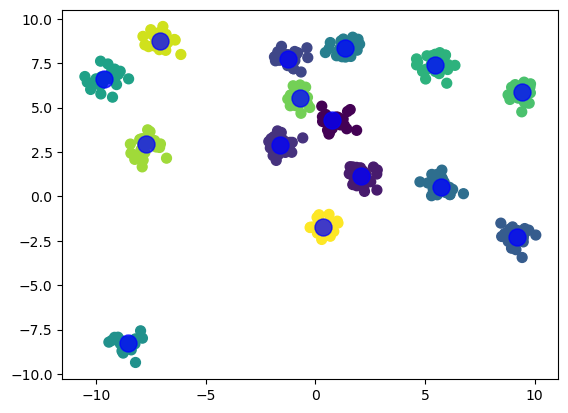

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

num_clusters = 15

# 生成一个数据集
X, y = make_blobs(n_samples=400, centers=num_clusters, cluster_std=0.4, random_state=0)

# 聚类
centers, u = am_pcm(X)

# 可视化结果
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=150, alpha=0.75, marker='o')
plt.show()